In [7]:
import os
import get_geedata
import numpy as np
import matplotlib.pyplot as plt

## Consulta de datos
### Inputs del código
 
 * Archivo csv con las coordendas, dichos datos deben estar en WGS84 (longitud | latitud).
 * Periodo en el cual se realizará la descarga.
 

### Extraer datos NOAA y resumirlos a nivel diario

In [2]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datainit = get_geedata.gee_weatherdata("2018-01-01","2018-12-31", "data/truestationlocation.csv","noaa")

In [3]:
## Señalar que bandas serán resumidas por promedio, sumatario, mínimio o máximo

avgbands =  ['Specific_humidity_height_above_ground', 
             'Pressure_surface']

sumbands = ['Downward_Long-Wave_Radp_Flux_surface_6_Hour_Average', 
            'Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
            'Upward_Long-Wave_Radp_Flux_surface_6_Hour_Average', 
            'Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
            'Precipitation_rate_surface_6_Hour_Average',
            'Potential_Evaporation_Rate_surface_6_Hour_Average']

minbands = ['Minimum_temperature_height_above_ground_6_Hour_Interval']
maxbands = ['Maximum_temperature_height_above_ground_6_Hour_Interval']


In [4]:
## extracción de los datos

noaadata= datainit.summarise_noaa(averagecols=avgbands,
                       cummulativecols=sumbands,
                       minimumcols = minbands,
                       maximumcols = maxbands)

D:\OneDrive - CGIAR\projects\gee_NOAA\get_geedata.py:239: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  bands = [x for x in bands if x not in notinall]


average features processed
cummulative features processed
minimum features processed
maximum features processed


   longitude  latitude  index
0  -78.62869  -5.65875      1
1  -78.69203  -5.64777      2


C:\Users\aaguilar\miniconda3\envs\gee_NOAA\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


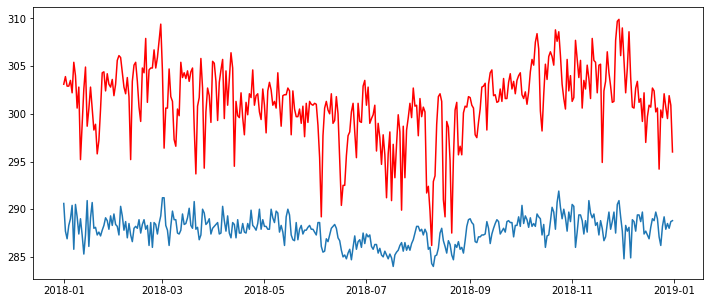

In [5]:
### gráficar resultados
print(datainit.features)

ref_long = datainit.features.longitude.loc[1]

plotdata = noaadata[np.round(noaadata.longitude, 5) == np.round(ref_long, 5)]
#plotdata = datasummarised[np.in1d(datasummarised.index.get_level_values(2), [-5.65875])]

plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['Minimum_temperature_height_above_ground_6_Hour_Interval'].values)
plt.plot(plotdata.date, plotdata['Maximum_temperature_height_above_ground_6_Hour_Interval'].values, color = 'red')
plt.show()


In [8]:
### exportar datos
noaadata.to_csv(os.path.join("results","noaa_data.csv"))

## Extraer datos CHIRPS

In [9]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datachirps = get_geedata.gee_weatherdata("2017-08-01","2018-12-31", "data/truestationlocation.csv","chirps")


In [10]:
## resumir los datos en una tabla
dfchirps = datachirps.CHIRPSdata_asdf()
dfchirps.head()

,precipitation,date,longitude,latitude
0,0.0,2017-08-01,-78.62869,-5.65875
1,0.0,2017-08-01,-78.69203,-5.64777
2,0.0,2017-08-02,-78.62869,-5.65875
3,0.0,2017-08-02,-78.69203,-5.64777
4,0.0,2017-08-03,-78.62869,-5.65875


   longitude  latitude  index
0  -78.62869  -5.65875      1
1  -78.69203  -5.64777      2


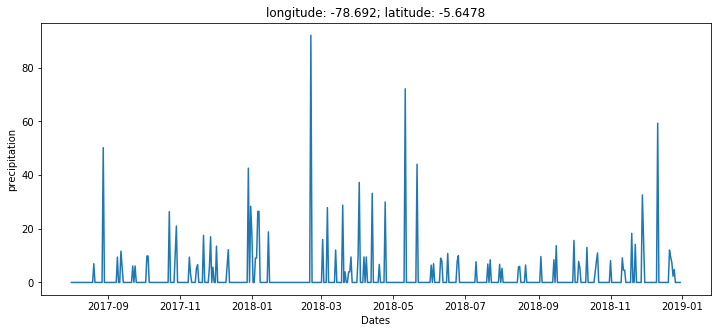

In [11]:
### gráficar resultados
print(datainit.features)
datachirps.plot_CHIRPS(feature_index= 1)

In [12]:
### exportar datos
dfchirps.to_csv(os.path.join("results","chirps_data.csv"))